Name: Aditya Gujar <br>
USN: 2448505 <br>
Subject: SPR <br>
Lab-7

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [ ]:
signal1, sr1 = librosa.load("hello_me.m4a", sr=None)
signal2, sr2 = librosa.load("hello_friend.m4a", sr=None)

print("Signal 1 length:", len(signal1), "Sample Rate:", sr1)
print("Signal 2 length:", len(signal2), "Sample Rate:", sr2)


/tmp/ipython-input-569502531.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal1, sr1 = librosa.load("hello_me.m4a", sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Signal 1 length: 217088 Sample Rate: 48000
Signal 2 length: 231424 Sample Rate: 48000


/tmp/ipython-input-569502531.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  signal2, sr2 = librosa.load("hello_friend.m4a", sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


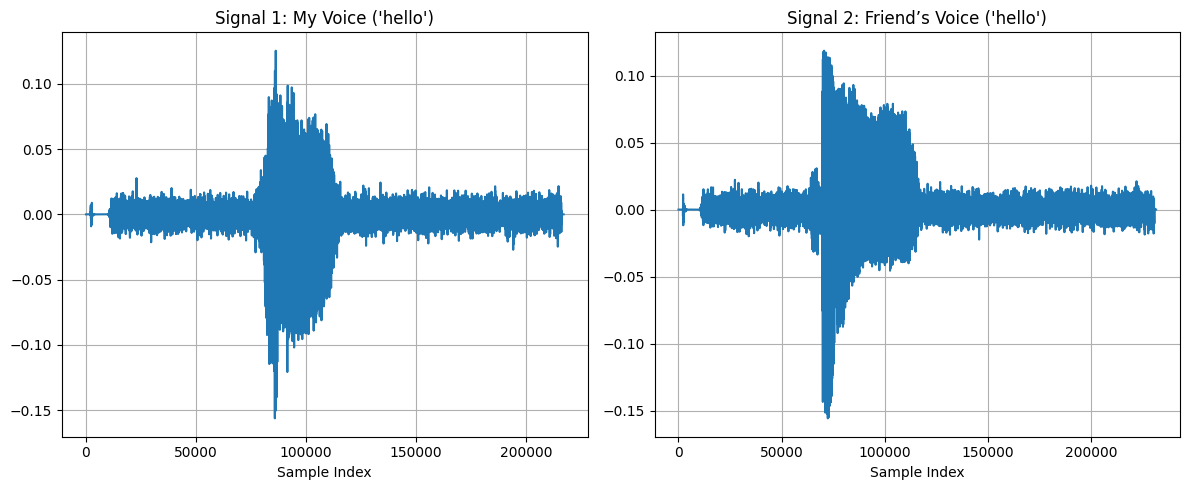

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(signal1)
plt.title("Signal 1: My Voice ('hello')")
plt.xlabel("Sample Index")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(signal2)
plt.title("Signal 2: Friend’s Voice ('hello')")
plt.xlabel("Sample Index")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
signal1_norm = signal1 / np.max(np.abs(signal1))
signal2_norm = signal2 / np.max(np.abs(signal2))


In [ ]:
# Trim first 1 second of audio
signal1_trim = signal1_norm[:sr1]
signal2_trim = signal2_norm[:sr2]

factor = 50
signal1_small = signal1_trim[::factor]
signal2_small = signal2_trim[::factor]

print("Reduced Signal 1 length:", len(signal1_small))
print("Reduced Signal 2 length:", len(signal2_small))


Reduced Signal 1 length: 960
Reduced Signal 2 length: 960


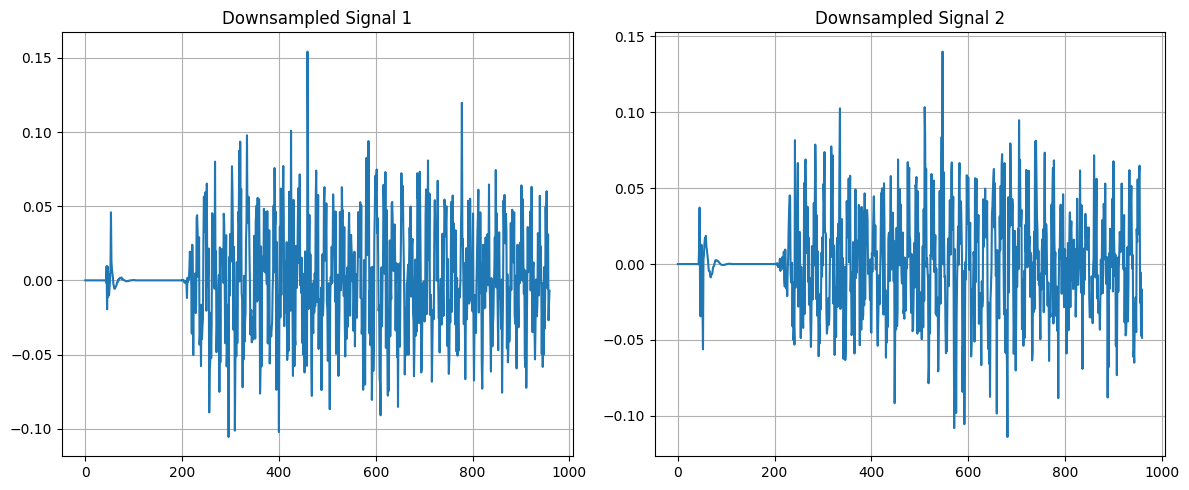

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(signal1_small)
plt.title("Downsampled Signal 1")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(signal2_small)
plt.title("Downsampled Signal 2")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
def dtw(x, y):
    n = len(x)
    m = len(y)

    dtw_matrix = np.full((n+1, m+1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(x[i-1] - y[j-1])
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i-1, j],
                dtw_matrix[i, j-1],
                dtw_matrix[i-1, j-1]
            )
    return dtw_matrix


In [ ]:
dtw_matrix = dtw(signal1_small, signal2_small)
dtw_matrix


array([[ 0.        ,         inf,         inf, ...,         inf,
                inf,         inf],
       [        inf,  0.        ,  0.        , ..., 21.85526832,
        21.87171955, 21.92028986],
       [        inf,  0.        ,  0.        , ..., 21.85526832,
        21.87171955, 21.92028986],
       ...,
       [        inf, 23.01913314, 23.01913314, ..., 14.05735791,
        14.06784928, 14.08947698],
       [        inf, 23.03397109, 23.03397109, ..., 14.08971933,
        14.05897119, 14.09270354],
       [        inf, 23.0409996 , 23.0409996 , ..., 14.10808507,
        14.06839392, 14.10051299]])

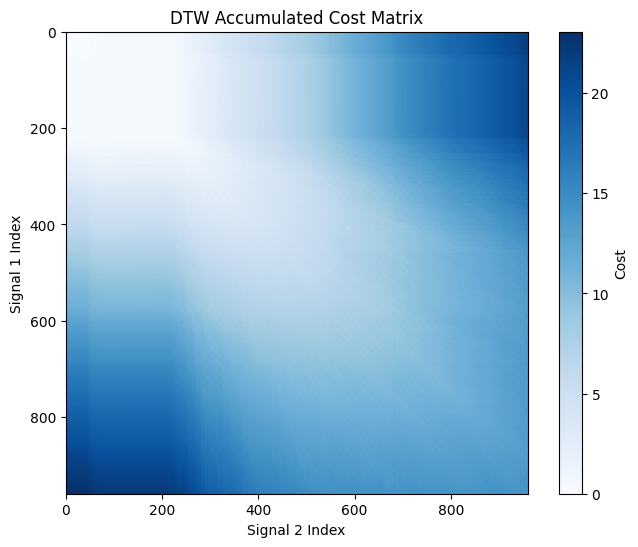

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(dtw_matrix[1:,1:], cmap='Blues', interpolation='nearest')
plt.title("DTW Accumulated Cost Matrix")
plt.xlabel("Signal 2 Index")
plt.ylabel("Signal 1 Index")
plt.colorbar(label="Cost")
plt.show()


In [ ]:
def extract_path(dtw_matrix):
    i, j = np.array(dtw_matrix.shape) - 1
    path = [(i-1, j-1)]

    while i > 1 or j > 1:
        options = [
            (i-1, j-1),
            (i-1, j),
            (i, j-1)
        ]
        costs = [dtw_matrix[o] for o in options]
        idx = np.argmin(costs)
        i, j = options[idx]
        path.append((i-1, j-1))

    path.reverse()
    return path

path = extract_path(dtw_matrix)


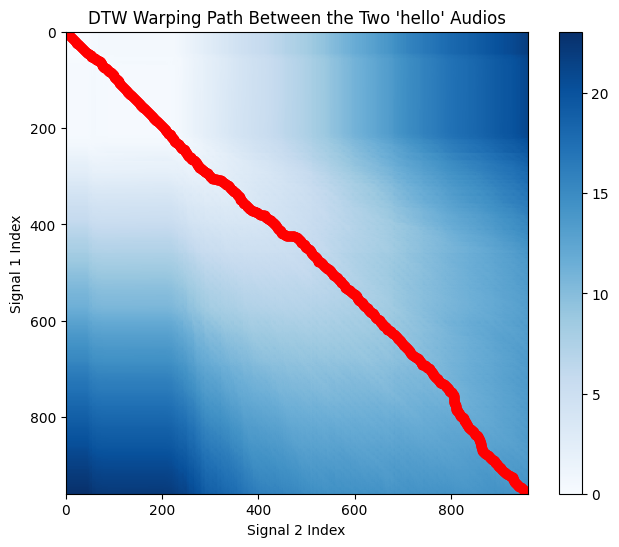

In [ ]:
px, py = zip(*path)

plt.figure(figsize=(8,6))
plt.imshow(dtw_matrix[1:,1:], cmap='Blues', interpolation='nearest')
plt.plot(py, px, '-o', color='red')
plt.title("DTW Warping Path Between the Two 'hello' Audios")
plt.xlabel("Signal 2 Index")
plt.ylabel("Signal 1 Index")
plt.colorbar()
plt.show()


In [ ]:
dtw_distance = dtw_matrix[-1, -1]
print("DTW Distance between my 'hello' and friend's 'hello':", dtw_distance)


DTW Distance between my 'hello' and friend's 'hello': 14.100512991019059
